In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn_logistic.csv')
df

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,224,0,171.5,160.0,212.4,5.0,1,1,0,99,...,103,13.60,102,9.56,2,1.35,DE,510,361-6563,1
5696,131,0,131.6,179.3,251.2,15.5,1,0,0,95,...,109,15.24,129,11.30,3,4.19,MS,415,333-9002,1
5697,132,0,291.2,234.2,191.7,8.9,1,0,0,104,...,132,19.91,87,8.63,3,2.40,MI,408,389-4608,1
5698,100,0,113.3,197.9,284.5,11.7,4,0,0,96,...,89,16.82,93,12.80,2,3.16,MT,415,341-4873,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

In [4]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [5]:
y = df['Churn']
y

0       0
1       0
2       0
3       0
4       0
       ..
5695    1
5696    1
5697    1
5698    1
5699    1
Name: Churn, Length: 5700, dtype: int64

In [6]:
X = df[['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']]
X

,Day Mins,Eve Mins,Night Mins,CustServ Calls,Account Length
0,265.1,197.4,244.7,1,128
1,161.6,195.5,254.4,1,107
2,243.4,121.2,162.6,0,137
3,299.4,61.9,196.9,2,84
4,166.7,148.3,186.9,3,75
...,...,...,...,...,...
5695,171.5,160.0,212.4,1,224
5696,131.6,179.3,251.2,1,131
5697,291.2,234.2,191.7,1,132
5698,113.3,197.9,284.5,4,100


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train_cv, X_test , y_train_cv, y_test = train_test_split(X, y , test_size = 0.2, random_state = 0)

In [9]:
X_train, X_val , y_train, y_val = train_test_split(X_train_cv, y_train_cv, test_size=0.2, random_state = 0)

In [10]:
X_train.shape, y_train.shape

((3648, 5), (3648,))

In [11]:
X_val.shape, y_val.shape

((912, 5), (912,))

In [12]:
X_test.shape, y_test.shape

((1140, 5), (1140,))

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [15]:
X_train_scaled

array([[-0.35173441, -0.99183796,  0.52553628, -0.52806104, -0.79646682],
       [-2.06260257,  0.27443837, -0.38100231, -1.14687462,  2.38917689],
       [-0.4044995 ,  0.29391955, -0.11066681, -0.52806104,  0.19745402],
       ...,
       [-1.64208077,  2.60633494, -0.60662067, -0.52806104, -0.18482322],
       [-0.34853653,  2.81283538,  1.91583315, -1.14687462,  0.50327582],
       [-1.11922667, -1.44964555, -0.67572899,  1.94719328,  0.29939462]])

In [16]:
X_val_scaled = scaler.transform(X_val)
X_val_scaled

array([[ 1.16086491,  0.76536397, -0.85866279, -0.52806104, -0.33773412],
       [-0.93534832, -0.35675167, -0.42368687, -0.52806104,  0.12099857],
       [ 0.09916729,  0.09326345, -0.19197072,  0.09075254, -0.51613017],
       ...,
       [ 0.7323484 ,  1.41019083, -0.19603592, -1.14687462, -0.77098167],
       [ 0.383779  ,  0.31340072, -0.21839449,  0.09075254,  0.80909761],
       [ 0.99937175,  0.89783595, -0.50092558, -1.14687462,  0.80909761]])

In [17]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.03680854, -0.38597344, -0.49686039,  0.09075254,  0.14648372],
       [-1.45660348,  1.11212887, -1.32209507, -1.14687462, -0.54161532],
       [-0.15826241, -1.29184804, -0.63304444,  0.09075254,  0.60521642],
       ...,
       [-0.69071016, -1.46328237,  0.72879606,  0.09075254, -1.9687837 ],
       [-1.53495164, -0.53013413, -0.41962167,  0.09075254,  0.96200851],
       [ 1.69011478,  0.62315139,  0.76741542, -0.52806104,  1.5226818 ]])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
y_train_pred = model.predict(X_train_scaled)

In [21]:
y_val_pred = model.predict(X_val_scaled)

In [22]:
y_test_pred = model.predict(X_test_scaled)

In [23]:
print('Training Accuracy', model.score(X_train_scaled, y_train))

Training Accuracy 0.7075109649122807


In [24]:
print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 0.7094298245614035


In [25]:
print('Test Accuracy', model.score(X_test_scaled, y_test))

Test Accuracy 0.706140350877193


In [26]:
def Accuracy(y1, y2):
    acc = np.sum(y1 == y2)/ len(y2)
    return acc

In [27]:
Accuracy(y_train, y_train_pred)

np.float64(0.7075109649122807)

In [28]:
Accuracy(y_val, y_val_pred)

np.float64(0.7094298245614035)

In [29]:
Accuracy(y_test, y_test_pred)

np.float64(0.706140350877193)

# HYPERPARAMETER TUNING:-

In [30]:
from sklearn.pipeline import make_pipeline

In [31]:
train_scores = []
val_scores = []

scaler = StandardScaler()

for la in np.arange(0.01, 5000.0, 100):

     scaled_lr_model = make_pipeline(scaler, LogisticRegression(C=1/la))
     scaled_lr_model.fit(X_train, y_train)

     train_score = Accuracy(y_train, scaled_lr_model.predict(X_train))
     val_score = Accuracy(y_val, scaled_lr_model.predict(X_val))

     train_scores.append(train_score)
     val_scores.append(val_score)

In [32]:
train_scores[:5]

[np.float64(0.7075109649122807),
 np.float64(0.7053179824561403),
 np.float64(0.7050438596491229),
 np.float64(0.7108004385964912),
 np.float64(0.7116228070175439)]

In [33]:
val_scores[:5]

[np.float64(0.7094298245614035),
 np.float64(0.7105263157894737),
 np.float64(0.7094298245614035),
 np.float64(0.7149122807017544),
 np.float64(0.7182017543859649)]

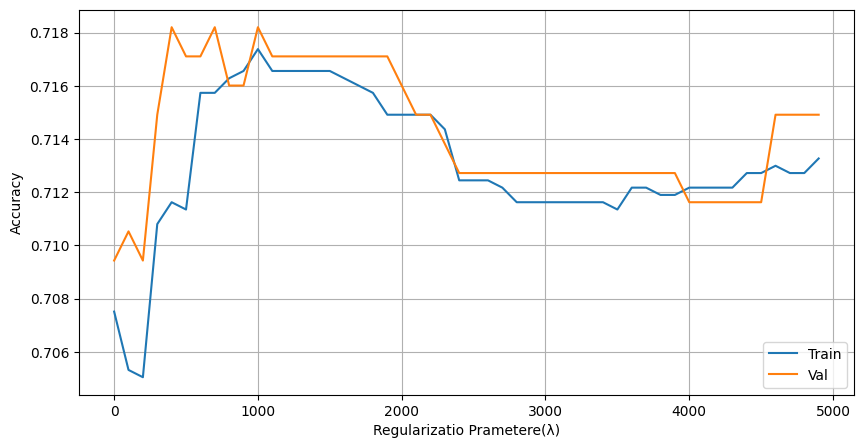

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(x = list(np.arange(0.01, 5000.0, 100)), y = train_scores, label='Train')
sns.lineplot(x = list(np.arange(0.01, 5000.0, 100)), y = val_scores, label='Val')
plt.legend(loc='lower right')

plt.xlabel('Regularizatio Prametere(λ)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [35]:
latest_model = LogisticRegression(C = 1/1000)

In [36]:
latest_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001)

In [37]:
Accuracy(y_train, latest_model.predict(X_train_scaled))

np.float64(0.7173793859649122)

In [38]:
Accuracy(y_val, latest_model.predict(X_val_scaled))

np.float64(0.7182017543859649)

In [39]:
Accuracy(y_test, latest_model.predict(X_test_scaled))

np.float64(0.706140350877193)